## ジオプロセシング ツールの使用

ArcGIS API for Python では、ジオプロセシング ツールボックスとその中のツールは、Python モジュールとそのモジュール内の関数として表されます。この構成の詳細については、「[ジオプロセシング ツールへのアクセス](https://github.com/EsriJapan/arcgis-python-api/blob/master/guide/08-using-geoprocessing-tools/accessing-geoprocessing-tools_ja.ipynb)」を参照してください。ガイドのこの部分では、次の点を確認します。

* ジオプロセシング ツールの呼び出し
* ツールの入力パラメーターと出力タイプについて
  - ヘルパータイプの使用
  - 入力として文字列を使用
* 複数の出力を持つツール
  - 複数の出力を作成するツールの呼び出し
  - 名前付きタプルを使用した複数の出力へのアクセス
* マップ イメージ レイヤーをエクスポートするツール


## ジオプロセシング ツールの呼び出し

ツールボックスをモジュールとしてインポートし、ツールの関数を呼び出すことで、ジオプロセシング ツールを簡単に実行できます。ザイオン国立公園のツールボックスの URL から `extract_zion_data` を実行する方法を見てみましょう。

In [1]:
# ArcGIS Online にログイン
from arcgis.gis import GIS
from arcgis.geoprocessing import import_toolbox

gis = GIS('https://www.arcgis.com', 'ユーザー名', 'パスワード')
# ザイオン国立公園のツールボックスをインポート
zion_toolbox_url = 'https://gis.ices.dk/gis/rest/services/Tools/ExtractZionData/GPServer'
zion = import_toolbox(zion_toolbox_url)

In [2]:
result=zion.extract_zion_data()

このように、ジオプロセシング ツールの実行は簡単です。これらのツールを効率的に使用するのに役立つ概念をいくつか学びましょう。

## ツールの入力パラメーターと出力タイプについて
ジオプロセシング ツールを呼び出す関数は、次のように、str、int、bool、float、dicts、datetime.datetime、および ArcGIS API for Python で定義されているヘルパー タイプなどの Python の組み込みデータ タイプを入力して、返すことができます。

* `arcgis.features.FeatureSet` -フィーチャ のセット
* `arcgis.geoprocessing.LinearUnit` - 指定された単位を持つ直線距離
* `arcgis.geoprocessing.DataFile` - データを参照する URL またはアイテム ID
* `arcgis.geoprocessing.RasterData` - URL またはアイテム ID とラスター データの形式

上記のデータ タイプをツールの入力パラメーターとして設定することもできます。

Note : ヘルパー タイプを使用する場合、関数は代わりに文字列を受け入れます。例えば、LinearUnit(5, 'Miles') の代わりに '5 Miles' を入力として渡したり、 DataFile や  RasterData の代わりに URL を渡すことができます

一部のジオプロセシング ツールは、ツールの結果を視覚化するために `arcgis.mapping.MapImageLayer` を返すように構成されています。 

いずれの場合も、ツール関数のドキュメントは、入力パラメーターのタイプと出力値を示します。

### ヘルパータイプの使用
`arcgis.geoprocessing` モジュールで定義されているヘルパータイプ ( `LinearUnit` , `DataFile` , `RasterData` ) は、文字列または URL を保持し、ディクショナリ表現を持つシンプルなクラスです。  

上記の `extract_zion_data()` 関数は、実行結果として `DataFile` を出力します。

In [16]:
type(result)

arcgis.geoprocessing._types.DataFile

`DataFile` は、以下のように出力されます。

In [17]:
result

{"url": "http://gis.ices.dk/gis/rest/directories/arcgisjobs/tools/extractziondata_gpserver/j48b6f17abdf142679b11e3a71adcce8d/scratch/output.zip"}

`DataFile` の場合、Web 上に作成された .zip をダウンロードできるなどいくつか関数が用意されています。

In [18]:
result.download()

'C:\Users\name\AppData\Local\Temp\output.zip'

### 入力として文字列を使用
`LinearUnit` , `RasterData` , `DataFile` などのヘルパータイプの代わりに、文字列を入力として使用することもできます。

以下の例では、`viewshed` 関数を呼び出して、地図上でクリックした場所から見える地理的な領域を計算して表示しています。この関数は、観測点を`FeatureSet` として、可視領域の最大表示距離を `LinearUnit` として受け取り、 `FeatureSet` を返します。

In [3]:
viewshed = import_toolbox('https://sampleserver1.arcgisonline.com/ArcGIS/rest/services/Elevation/ESRI_Elevation_World/GPServer')

In [20]:
help(viewshed.viewshed)

Help on function viewshed:

viewshed(input_observation_point: arcgis.features.feature.FeatureSet = {'geometryType': 'esriGeometryPoint', 'spatialReference': {'wkid': 54003}, 'Fields': [{'name': 'FID', 'type': 'esriFieldTypeOID', 'alias': 'FID'}, {'name': 'Shape', 'type': 'esriFieldTypeGeometry', 'alias': 'Shape'}, {'name': 'OffsetA', 'type': 'esriFieldTypeDouble', 'alias': 'OffsetA'}], 'fields': [{'name': 'FID', 'type': 'esriFieldTypeOID', 'alias': 'FID'}, {'name': 'Shape', 'type': 'esriFieldTypeGeometry', 'alias': 'Shape'}, {'name': 'OffsetA', 'type': 'esriFieldTypeDouble', 'alias': 'OffsetA'}]}, viewshed_distance: arcgis.geoprocessing._types.LinearUnit = {'distance': 15000, 'units': 'esriMeters'}, gis=None, future=False) -> arcgis.features.feature.FeatureSet
            
    
    
    Parameters:
    
       input_observation_point: Input Observation Point (FeatureSet). Required parameter. 
    
       viewshed_distance: Viewshed Distance (LinearUnit). Required parameter. 
    
     

In [21]:
import arcgis 
from arcgis.gis import GIS

gis=GIS()
arcgis.env.out_spatial_reference = 4326

In [22]:
map = gis.map('South San Francisco', zoomlevel=12)
map

MapView(layout=Layout(height='400px', width='100%'))

以下のコード スニペットは、イベント リスナーを地図に追加し、クリックされたときに、マップ ウィジェットとクリックされたポイント ジオメトリを入力として `get_viewshed()` が呼び出されるようにしています。イベント ハンドラーは、クリックされたポイント ジオメトリから `FeatureSet` を作成し、`viewshed_distance` パラメーターの入力として、`LinearUnit` オブジェクトを作成する代わりに、文字列 '5 Miles' を使用します。これらは `viewshed` 関数に渡され、観測点からの可視領域を返します。マップ ウィジェットは、 `draw()` メソッドを使って、返された `FeatureSet` を描画することができます。

In [23]:
from arcgis.features import Feature, FeatureSet

def get_viewshed(m, g):
    res = viewshed.viewshed(FeatureSet([Feature(g)]),"5 Miles") # "5 Miles" とするか LinearUnit(5, 'Miles') で可視領域を示す
    m.draw(res)

map.on_click(get_viewshed)

## 複数の出力を持つツール
一部のジオプロセシング ツールは、複数の結果を返すことができます。これらのツールの場合、対応する関数は複数の出力値を[名前付きタプル](https://docs.python.org/3/library/collections.html#namedtuple-factory-function-for-tuples-with-named-fields)として返します。
次の例では、複数の出力を返すツールを使用しています。

In [24]:
hotspots = import_toolbox('https://sampleserver6.arcgisonline.com/arcgis/rest/services/911CallsHotspot/GPServer')

In [25]:
help(hotspots.execute_911_calls_hotspot)

Help on function execute_911_calls_hotspot:

execute_911_calls_hotspot(query: str = '("DATE" > date \'1998-01-01 00:00:00\' AND "DATE" < date \'1998-01-31 00:00:00\') AND ("Day" = \'SUN\' OR "Day"= \'SAT\')', gis=None, future=False) -> tuple
            
    sdas
    
    Parameters:
    
       query: Query (str). Required parameter.  A query string to filter calls. The query can be based on the day of the week such MON/TUE/WED/THU/FRI/SAT (Field Name: Day) or a date range between Jan 1st ,1998 to May 31, 1998 (Field Name: Date). 
    
            gis: Optional, the GIS on which this tool runs. If not specified, the active GIS is used.
    
    
            future: Optional, If True, a future object will be returns and the process will not wait for the task to complete. The default is False, which means wait for results.
    
    
    Returns the following as a named tuple:
       result_layer - Result Layer as a MapImageLayer
       output_features - Output_Features as a dict
       

### 複数の出力を作成するツールの呼び出し
次のコード スニペットは、ツールから返された複数の出力を Python によって自動的に複数の変数に入力する方法を示しています。また、使用しない出力結果は、変数名として "_" を使用して破棄することができます。

In [26]:
_ , output_features, hotspot_raster = hotspots.execute_911_calls_hotspot()

In [27]:
output_features

{'mapImage': {'href': 'https://sampleserver6.arcgisonline.com/arcgis/rest/directories/arcgisoutput/911CallsHotspot_GPServer/911CallsHotspot_MapServer/_ags_mapea516982b9114465968cb5823f7b36e0.png',
  'width': 400,
  'height': 400,
  'extent': {'xmin': 7586498.220384206,
   'ymin': 645329.284820139,
   'xmax': 7628948.291202795,
   'ymax': 687779.355638728,
   'spatialReference': {'wkid': 102726, 'latestWkid': 102726}},
  'scale': 122256.20395753652}}

In [28]:
hotspot_raster

{'mapImage': {'href': 'https://sampleserver6.arcgisonline.com/arcgis/rest/directories/arcgisoutput/911CallsHotspot_GPServer/911CallsHotspot_MapServer/_ags_map123e2e21ea7f422984e14909a17cae08.png',
  'width': 400,
  'height': 400,
  'extent': {'xmin': 7586498.220384206,
   'ymin': 645329.284820139,
   'xmax': 7628948.291202795,
   'ymax': 687779.355638728,
   'spatialReference': {'wkid': 102726, 'latestWkid': 102726}},
  'scale': 122256.20395753652}}

### 名前付きタプルを使用した複数の出力へのアクセス
次のコード スニペットは、名前付きタプルを使って、ツールから返される複数の出力にアクセスしています。

In [29]:
result=hotspots.execute_911_calls_hotspot() 

In [30]:
result.result_layer

<MapImageLayer url:"https://sampleserver6.arcgisonline.com/arcgis/rest/services/911CallsHotspot/MapServer/jobs/j85f4ff8afc084a5fb9d0d7ed99f0d684">

In [31]:
result.output_features

{'mapImage': {'href': 'https://sampleserver6.arcgisonline.com/arcgis/rest/directories/arcgisoutput/911CallsHotspot_GPServer/911CallsHotspot_MapServer/_ags_map40ae5e4cfbf34b13b163f5d9bf868558.png',
  'width': 400,
  'height': 400,
  'extent': {'xmin': 7586498.220384206,
   'ymin': 645329.284820139,
   'xmax': 7628948.291202795,
   'ymax': 687779.355638728,
   'spatialReference': {'wkid': 102726, 'latestWkid': 102726}},
  'scale': 122256.20395753652}}

In [32]:
result.hotspot_raster

{'mapImage': {'href': 'https://sampleserver6.arcgisonline.com/arcgis/rest/directories/arcgisoutput/911CallsHotspot_GPServer/911CallsHotspot_MapServer/_ags_mape2f4e0a210c14187aaa09e40b7ca9e3c.png',
  'width': 400,
  'height': 400,
  'extent': {'xmin': 7586498.220384206,
   'ymin': 645329.284820139,
   'xmax': 7628948.291202795,
   'ymax': 687779.355638728,
   'spatialReference': {'wkid': 102726, 'latestWkid': 102726}},
  'scale': 122256.20395753652}}

## マップ イメージ レイヤーをエクスポートするツール
一部のジオプロセシング ツールは、結果を簡単に視覚化できるように、出力をマップイメージレイヤーとして返すように構成されています。結果のレイヤーは、地図に追加したり、クエリを実行したりできます。
上記の hotspots() は、 hotspot_raster にマップイメージレイヤーを出力しています。このラスター画像は、 IPython を使用することで Jupyter Notebook 上で確認できます。

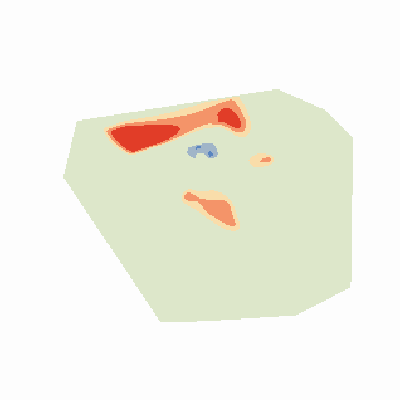

In [33]:
from IPython.display import Image
Image(hotspot_raster['mapImage']['href'])